In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
estadao_url = "../base_aplicacao_resultado/rotulado_tratado_links_estadao_resgatados.csv"

In [18]:
estadao = pd.read_csv(estadao_url, index_col = [0])
print("Quantidade dados Estadão: ", estadao.shape)

Quantidade dados Estadão:  (2398, 6)


# ANÁLISE DE CLASSIFICAÇÃO ENTRE AS CARTAS DO ESTADÃO

In [19]:
estadao.loc[(estadao.links.str.contains("/opiniao.estadao.")) & (estadao.links.str.contains("cartas") | estadao.links.str.contains("forum-dos-leitores")), "cartas"] = "sim"
estadao.cartas.fillna("nao", inplace = True)

In [20]:
print("Quantidad de cartas Estadão\n")
estadao.cartas.value_counts()

Quantidad de cartas Estadão



nao    2204
sim     194
Name: cartas, dtype: int64

In [21]:
estadao["metaforico"] = estadao.metaforico_pred.map({1: "sim", 0:"nao"}) 

In [22]:
# estadao.loc[(estadao.links.str.contains("/opiniao.estadao.")) & ~(estadao.links.str.contains("cartas") | estadao.links.str.contains("forum-dos-leitores")), "opiniao"] = "sim"
# estadao.opiniao.fillna("nao", inplace = True)

In [23]:
# estadao[["ano","links","paragrafos_resgatados", "paragrafos_tratados_sw","metaforico", "cartas", "opiniao"]].to_excel("base_estadao_de_analise.xlsx", index = False)

In [24]:
grp_metaforico_carta = estadao.groupby(["metaforico", "cartas"], as_index = False).size().rename(columns = {"size": "quantidade_cartas"})
grp_metaforico = estadao.groupby("metaforico", as_index = False).size().rename(columns = {"size": "quantidade_metaforico"})
grp2 = grp_metaforico_carta.merge(grp_metaforico, on = "metaforico", how = "left")
grp2["percentual"] = (grp2["quantidade_cartas"] / grp2["quantidade_metaforico"]) * 100
grp2

,metaforico,cartas,quantidade_cartas,quantidade_metaforico,percentual
0,nao,nao,1349,1364,98.900293
1,nao,sim,15,1364,1.099707
2,sim,nao,855,1034,82.688588
3,sim,sim,179,1034,17.311412


### O que quer dizer? 
- Do que foi classificado como metafórico, 17% são originalmente textos de opinião;

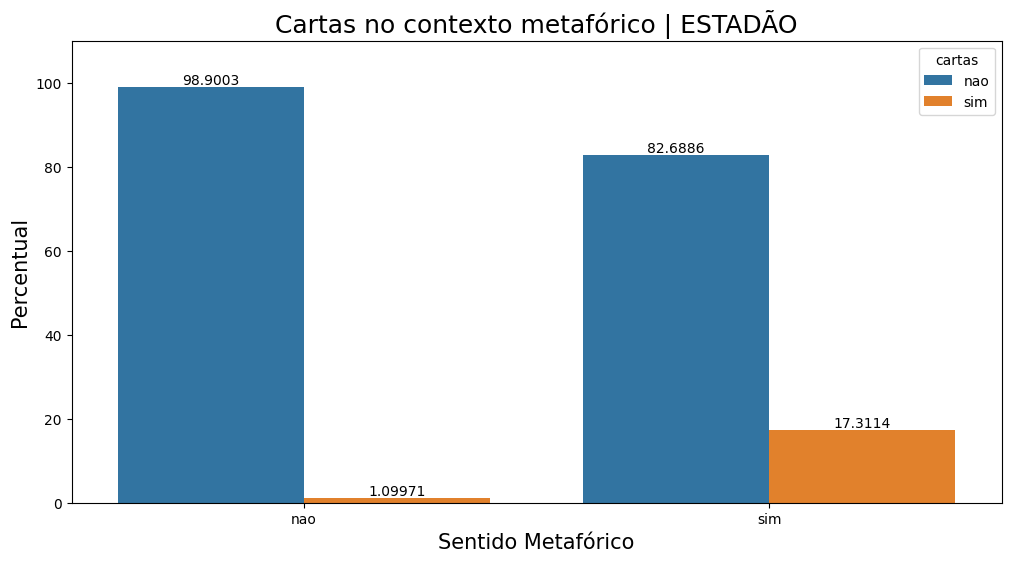

In [25]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = "metaforico", y = "percentual", hue = "cartas", data = grp2)
ax.set_xlabel("Sentido Metafórico", fontsize = 15)
ax.set_ylabel("Percentual", fontsize = 15)
ax.set_title("Cartas no contexto metafórico | ESTADÃO", fontsize = 18)
ax.set_ylim(0, 110)
for i in ax.containers:
    ax.bar_label(i,)
ax = ax 

In [26]:
grp_carta_metaforico = estadao.groupby(["cartas", "metaforico"], as_index = False).size().rename(columns = {"size": "quantidade_metaforicos"})
grp_carta = estadao.groupby("cartas", as_index = False).size().rename(columns = {"size": "quantidade_cartas"})
grp22 = grp_carta_metaforico.merge(grp_carta, on = "cartas", how = "left")
grp22["percentual"] = (grp22["quantidade_metaforicos"] / grp22["quantidade_cartas"]) * 100
grp22


,cartas,metaforico,quantidade_metaforicos,quantidade_cartas,percentual
0,nao,nao,1349,2204,61.206897
1,nao,sim,855,2204,38.793103
2,sim,nao,15,194,7.731959
3,sim,sim,179,194,92.268041


### O que quer dize?
- Das cartas encontradas, 92% foi calsssificado com uso no sentido metafórico;
- Do que não é carta, 38% foi classificado como metafórico;

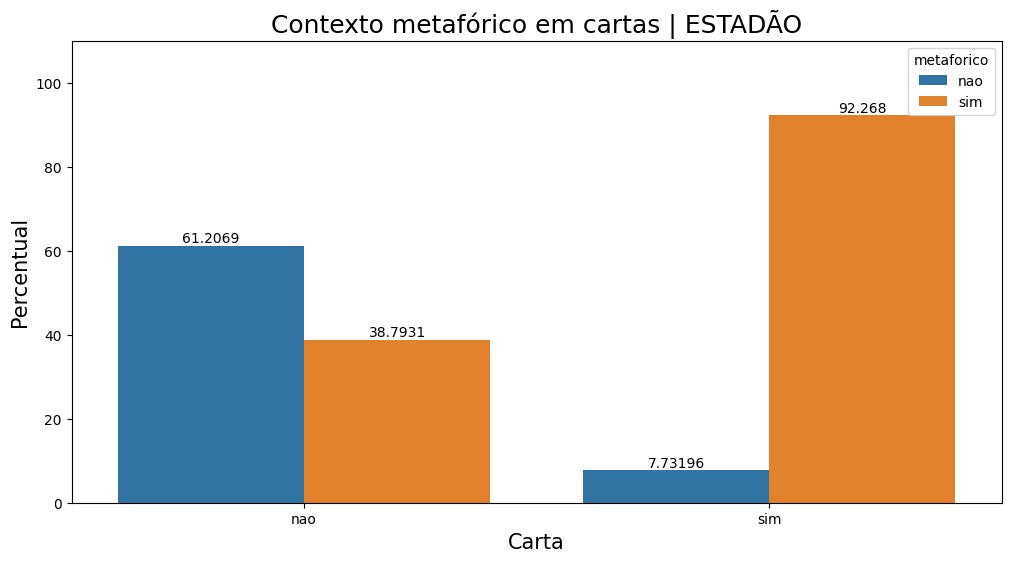

In [27]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = "cartas", y = "percentual", hue = "metaforico", data = grp22)
ax.set_xlabel("Carta", fontsize = 15)
ax.set_ylabel("Percentual", fontsize = 15)
ax.set_title("Contexto metafórico em cartas | ESTADÃO", fontsize = 18)
ax.set_ylim(0, 110)
for i in ax.containers:
    ax.bar_label(i,)
ax = ax 

## Análise de proporcionalidade 

In [28]:
grp_carta_metaforico

,cartas,metaforico,quantidade_metaforicos
0,nao,nao,1349
1,nao,sim,855
2,sim,nao,15
3,sim,sim,179


## O que significa: 
- Dentre os textos de carta, os texto classficados como não-metafórico estão na proporção de 1:11.9. Ou seja, a cada uma carta classificada como não-metafórico, temos 11.9 classficadas como metafórico;
- Dentre os textos comuns, os textos calssificados como não-metafóricos estão na proporção de 1:0.63. Ou seja, a cada um carta classificada como não-metafórico, temos 0.63 sendo classificadas como metafóricos

In [29]:
!jupyter nbconvert --to html --no-input analise_cartas_estadao.ipynb

[NbConvertApp] Converting notebook analise_cartas_estadao.ipynb to html
[NbConvertApp] Writing 666696 bytes to analise_cartas_estadao.html


In [30]:
# folha.to_excel("base_aplicacao_resultado/folha_cartas_identificadas.xlsx", index = False)
# estadao.to_excel("base_aplicacao_resultado/estadao_cartas_identificadas.xlsx", index = False)